# Introduction to ROOT package
Author: Marcin Konecki
# Example 0
type root in shell and try some simple calculations, draw simple TF1 function and browse a root file

# Example 1 - histogramming

In [1]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-

import sys
from ROOT import *
from readData import readData 
import numpy as np


#
# read data 
#
throw1 = []
throw2 = []
readData('data_dice.txt', throw1, throw2)

#
# print data 
#
allDice=throw1+throw2
sumDice=np.add(throw1,throw2)
print ('number of    throws1: {0:2d}, number of throws2: {1:2d}'.format(len(throw1),len(throw2)) )
print ('number of all throws: {0:2d}, number of combined throws: {1:2d}'.format(len(allDice),len(sumDice)) )


#
# define a Canva and histogram
#
c = TCanvas('cDice','cDice',1000,500)
c.Divide(2,1)
hDice = TH1D('hDice','All throws; dice; #events',6,0.5,6.5)
hDice.Sumw2()
hDiceSum = TH1D('hDiceSum','Throw 1 and 2 combined; sum of dice; #events',12,0.5,12.5)
hDiceSum.Sumw2()

# decorations 
hDice.SetMinimum(0) 
hDice.GetXaxis().SetNdivisions(106)
hDice.SetStats(0)
hDice.SetFillStyle(1)
#hDice.SetLineColor(kRed)
hDice.SetLineWidth(1)
hDice.SetLineStyle(3)
hDice.SetBarWidth(0.8)
hDice.SetBarOffset(0.1)
c.SetGrid(0,1)

for i in range(len(allDice)) :
  hDice.Fill( allDice[i])
for i in range(len(sumDice)) :
  hDiceSum.Fill( sumDice[i])

c.cd(1)
hDice.DrawCopy('b histo')
c.cd(2)
#hDiceSum.Print("all")
hDiceSum.DrawCopy('histo')
print('-----------')
c.Print('cDice.png')
#input('press enter to store histo and exit')
outfile=TFile.Open('histos.root',"RECREATE")
outfile.cd()
hDice.Write()
hDiceSum.Write()
outfile.Close()

Welcome to JupyROOT 6.24/04
number of    throws1: 137, number of throws2: 137
number of all throws: 274, number of combined throws: 137
-----------


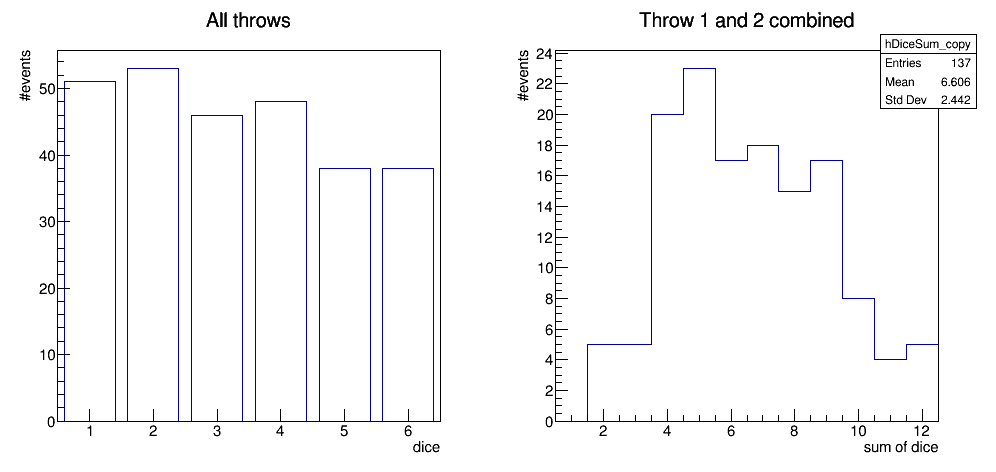

In [2]:
from IPython.display import Image
Image(filename='cDice.png')

# Example 2 
access to histograms, graphs, decorations

In [3]:
#!/usr/bin/python3
from ROOT import *
f=TFile('histos.root')
f.ls()
hDice=f.Get('hDice')
#hDice.Print("all")

print("sum of entries: ",hDice.GetEntries())
print("integral:       ",hDice.Integral() )
hDice.Scale(1./hDice.Integral())
hDice.SetMarkerStyle(20)
hDice.SetMarkerColor(2)
hDice.SetMinimum(0.1)
hDice.SetMaximum(0.25)
print("integral:       ",hDice.Integral() )
nbins=hDice.GetNbinsX()

#acess to content bin-by-bin.
# bin==1 underflow
# bin=nbins+1 overflow
for i in range(1,nbins+1):
    print("bin %d [%5.2f,%5.2f[ = %4.3f"% (i,hDice.GetBinLowEdge(i),hDice.GetBinLowEdge(i+1),hDice.GetBinContent(i)))
    
gr=TGraphErrors(nbins)
gr.SetMarkerStyle(21)
gr.SetMarkerColor(2)
for i in range(nbins):
    gr.SetPoint(i,hDice.GetBinCenter(i+1), hDice.GetBinContent(i+1))
    gr.SetPointError(i, 0., hDice.GetBinError(i+1))

c=TCanvas('cDrawings','simple drawings',1200,500)
c.Divide(3,1)
c.cd(1)
hDice.DrawCopy('hist e')
c.cd(2)
gr.Draw('AC PX')
c.cd(3)
hNull=hDice.Clone()
hNull.SetTitle('Histo and Graph')
hNull.DrawCopy('hist')
gr.Draw('PZ')

c.Print('cDrawings.png')
    

sum of entries:  274.0
integral:        274.0
integral:        1.0
bin 1 [ 0.50, 1.50[ = 0.186
bin 2 [ 1.50, 2.50[ = 0.193
bin 3 [ 2.50, 3.50[ = 0.168
bin 4 [ 3.50, 4.50[ = 0.175
bin 5 [ 4.50, 5.50[ = 0.139
bin 6 [ 5.50, 6.50[ = 0.139
TFile**		histos.root	
 TFile*		histos.root	
  KEY: TH1D	hDice;1	All throws
  KEY: TH1D	hDiceSum;1	Throw 1 and 2 combined


Info in <TCanvas::Print>: png file cDrawings.png has been created


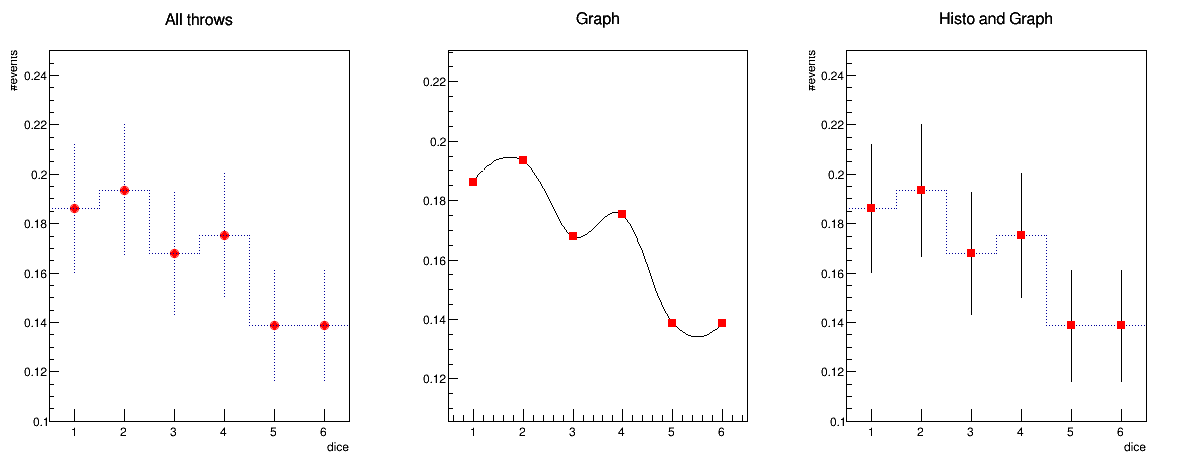

In [4]:
from IPython.display import Image
Image(filename='cDrawings.png')

# Example 3 - functions

In [5]:
#!/usr/bin/python3
import math
from ROOT import *

cFunctions=TCanvas('cFunctions')
f1=TF1("f1","[0]*x*sin([1]*x)",0.,10.)
f1.SetParameter(0,5.)
f1.SetParameter(1,1.)
f1.SetLineColor(kYellow)
f1.DrawCopy()

f2=TF1('f2','gaus(x,[0..2])*expo(x,[3..4])',0.,10.)
f2.SetParameter(0,0.1)
f2.SetParameter(1,1.)
f2.SetParameter(2,1.)
f2.SetParameter(3,3.)
f2.SetParameter(4,1.)
f2.SetLineColor(kRed)
f2.DrawCopy('same')

def mySin(x, par):
    return par[0]*sin(par[1]*x[0])

f3 = TF1('f3',mySin, 0., 10., 2)
f3.SetParameter(0, 20.);
f3.SetParameter(1, 0.5);
f3.SetLineColor(kBlue)
f3.DrawCopy('same')

legend=TLegend(0.1,25,4.,40.,"","")
legend.AddEntry(f1,'[0]*x*sin([1]*x)')
legend.AddEntry(f2,'gaus(0)*expo(3)')
legend.AddEntry(f3,'mySin')
legend.Draw()

cFunctions.Update()
cFunctions.Print('.png')

Info in <TCanvas::Print>: png file ./cFunctions.png has been created


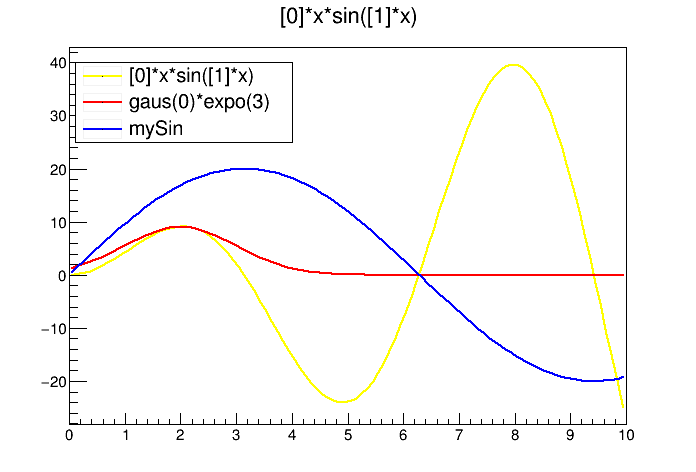

In [6]:
from IPython.display import Image
Image(filename='cFunctions.png')

# Example 4 - uniform random number generator

In [7]:
#!/usr/bin/python3
import math
from ROOT import *

gRandom.SetSeed(2018)
def myDistr() :
  val = gRandom.Uniform(1.)
  if val < 0.5 : val -= 0.5 
  else: val += 0.5 
  return val

sigma = math.sqrt(7./12)
mu = 0.5

def main() :
  cFlat = TCanvas('cFlat','cFlat',800,600)
  hVal = TH1D('hVal','flat*2',300, -1., 2.)
  hVal.SetStats(0)

  for i in  range(1000000) :
    val=myDistr()
    hVal.Fill(val)

  hVal.Draw()
  cFlat.Update()
  cFlat.Print('.png')

if __name__ == "__main__" :
  main()


Info in <TCanvas::Print>: png file ./cFlat.png has been created


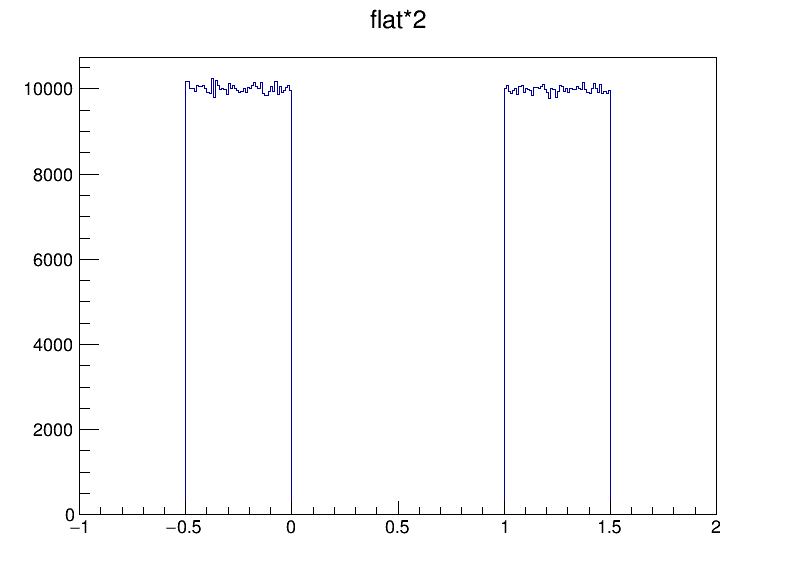

In [8]:
from IPython.display import Image
Image(filename='cFlat.png') 

In [9]:
#!/usr/bin/python3

import sys
import math
from ROOT import *

from myDistr_2step import myDistr, sigma, mu 

cCTG = TCanvas('cCTG','cCTG',1000,500)
hCTG = TH1D('hCTG','hCTG',100, -5., 5.)
hVal = TH1D('hVal','hVal',300, -1., 2.)

#
# loop over experiments, each gives and average X_i
#
nDistrib = 50000 #
for idist in range (0,nDistrib) :


# single try X_i, repeated nProb
#
  sum = 0
  nProb = 25 #enough for average
  for proba in range(0,nProb) :
    val = myDistr()
    hVal.Fill(val)
    sum += val
  #
  # result for singe X_i computation is histogrammed
  #
  ctg_numerator = (sum/nProb)-mu  
  ctg_denominator = sigma/math.sqrt(nProb)
  ctg = ctg_numerator/ctg_denominator
  hCTG.Fill(ctg)


gStyle.SetOptStat(1110)
cCTG.Divide(2,1)
cCTG.cd(1)
gStyle.SetOptStat(1110)
hVal.DrawCopy()

cCTG.cd(2)
hCTG.Scale(1./nDistrib*10)    #10 due to bin whdth
hCTG.Draw('hist')

g1 = TF1("g1", "gaus",-5,5 )
sigmaGauss = 1.
g1.SetParameter(0, 1./sigmaGauss/math.sqrt(2*math.pi) )
g1.SetParameter(1,0)
g1.SetParameter(2,sigmaGauss)
g1.DrawCopy('same')

cCTG.Print("cCTG.png")


Info in <TCanvas::Print>: png file cCTG.png has been created


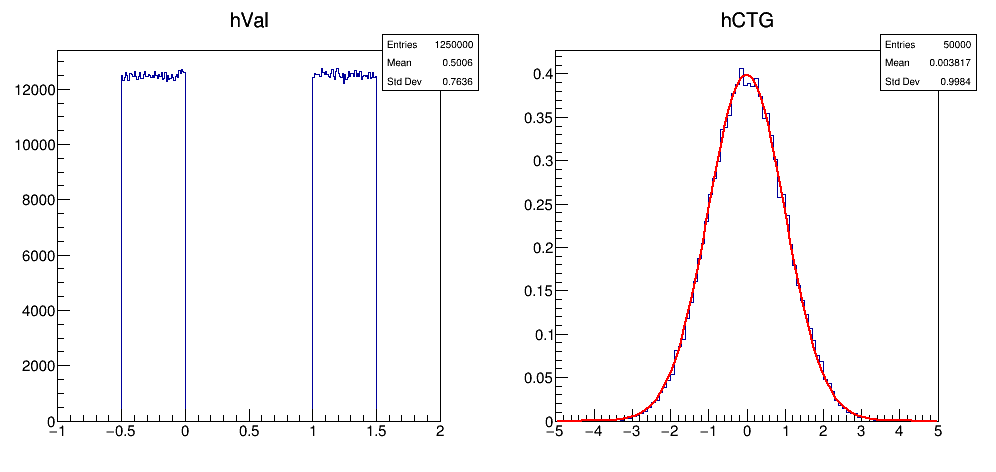

In [10]:
from IPython.display import Image
Image(filename='cCTG.png') 

# Example 5 - event processing

In [11]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-

import sys
from ROOT import *
from array import array

## A C/C++ structure is required, to allow memory based access
gROOT.ProcessLine(
   "struct Vertex_t {\
    Int_t id;\
    Double_t x,y,z; \
    double perp() { return sqrt(x*x+y*y); } \
};")

gRandom.SetSeed(2022)
vertex = Vertex_t()
pid = array('i',[0])

f = TFile('myTree.root','RECREATE')
myTree  = TTree('myTree','simple tree with vertex data')
myTree.Branch('vertex',vertex)
myTree.Branch('pid',pid,'pid/I')

for i in range(100) :
  pid[0] = gRandom.Integer(100)
  vertex.id = i
  vertex.x = gRandom.Uniform(10.)
  vertex.y = gRandom.Uniform(10.)
  vertex.z = gRandom.Uniform(200.)
  
#  print ('vertex id:{0:3d}, perp={1:5.2f}'.format(vertex.id,vertex.perp()))
  myTree.Fill()       
myTree.Print("all")
f.Write()
f.Close()  


******************************************************************************
*Tree    :myTree    : simple tree with vertex data                           *
*Entries :      100 : Total =            7431 bytes  File  Size =          0 *
*        :          : Tree compression factor =   1.00                       *
******************************************************************************
*Branch  :vertex                                                             *
*Entries :      100 : BranchElement (see below)                              *
*............................................................................*
*Br    0 :id        : Int_t                                                  *
*Entries :      100 : Total  Size=       1035 bytes  One basket in memory    *
*Baskets :        0 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :x         : Double_t                      

# Example 6 - event analysis

In [12]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-

from ROOT import *
from array import array
gROOT.ProcessLine(
 "struct Vertex_t {\
    Int_t id;\
    Double_t x,y,z; \
    double perp() { return sqrt(x*x+y*y); } \
};")
pid=array('i',[0])
myVert=Vertex_t()

myChain=TChain('myTree')
myChain.Add('myTree.root')
myChain.SetBranchAddress("vertex",myVert)
myChain.SetBranchAddress("pid",pid)

nEntries = myChain.GetEntries()
for iev in range (nEntries) :
  myChain.GetEntry(iev)
print ('entires:',nEntries)


entires: 100


# Example 7 - Fitting

In [13]:
#!/usr/bin/python3

import sys
import math
from ROOT import *

def average_meas(points) :
  average = 0.
  for val in  points:
    average += val
  average /= len(points)
  return average

def sigma_meas(points) :
  average = average_meas(points)
  ss=0.
  for point in points: ss+= pow(point-average,2);
  sigma = math.sqrt(ss/(len(points)-1))
  return sigma


x = [ 1,  3,   4,   5,    6,   7,   8]
y = []
e = []
a=1.
b=2.
s = [ 1., 2., 3., 1., 2.,  3., 1.]
g = TF1("g","gaus",-20.,30.)
g.SetParameter(0,1.)
gRandom.SetSeed(2022)
for i in range(len(x)):
  mean=a*x[i]+b
  g.SetParameter(1,mean)
  g.SetParameter(2,s[i])
  values = []
  nValues =10
  for j in range(nValues) :
    val = g.GetRandom()
    values.append(val)
  y.append(average_meas(values))
# e.append(s[i]/math.sqrt(nValues))
  e.append(sigma_meas(values)/math.sqrt(nValues))
  print ('point  i:',i,' x=',x[i],' y=',y[i],' error=',e[i])

gr=TGraphErrors(7)
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)

S=0
Sxx=0
Sxy=0
Sx=0
Sy=0

for i in range (len(x)) :
  gr.SetPoint(i, x[i], y[i])
  gr.SetPointError(i, 0.,e[i])

  w_i=1./e[i]/e[i]
  S+=w_i
  Sxx += x[i]*x[i]*w_i
  Sx += x[i]*w_i
  Sxy += x[i]*y[i]*w_i
  Sy += y[i]*w_i
  

D = S*Sxx-Sx*Sx
a = (S*Sxy-Sx*Sy)/D
b = (Sxx*Sy-Sx*Sxy)/D


c = TCanvas('cFitting','cFitting',600,600)
hDummy = TH1D('hDummy','Prosta',100,0.,10.)
hDummy.SetMaximum(12.)
hDummy.SetMinimum(0.)
hDummy.GetXaxis().SetTitle("x")
hDummy.GetYaxis().SetTitle("y")
hDummy.SetStats(0)
hDummy.DrawCopy()
 
gr.Draw('s p')

fline = TF1("flane", "[0]*x+[1]",0.,9.5)
fline.SetParameter(0,a)
fline.SetParameter(1,b)
fline.Draw('same')

c.Print('cFitting.png')

chi2 = 0;
for i in range (0,7) :
  d = (y[i]-(a*x[i]+b))/e[i]
  chi2 += d*d
print (' a=',a,' b=',b)
print ('sa=',math.sqrt(S/D),' sb=',math.sqrt(Sxx/D))
print ('chi2/NDF=',chi2/(len(x)-2.))

point  i: 0  x= 1  y= 2.3305497716275085  error= 0.34535608893314684
point  i: 1  x= 3  y= 5.795696359926257  error= 0.54803932026921
point  i: 2  x= 4  y= 7.545475724637645  error= 0.9677821648029868
point  i: 3  x= 5  y= 6.985439523588833  error= 0.30820130455615974
point  i: 4  x= 6  y= 7.815392962723381  error= 0.8897776692388384
point  i: 5  x= 7  y= 9.639110678040973  error= 0.6504965737010797
point  i: 6  x= 8  y= 9.781325701329177  error= 0.42209576471647786
 a= 1.0692630421540321  b= 1.6493819900495508
sa= 0.0708306842328103  sb= 0.35963991750068286
chi2/NDF= 1.7353524377301077


Info in <TCanvas::Print>: png file cFitting.png has been created


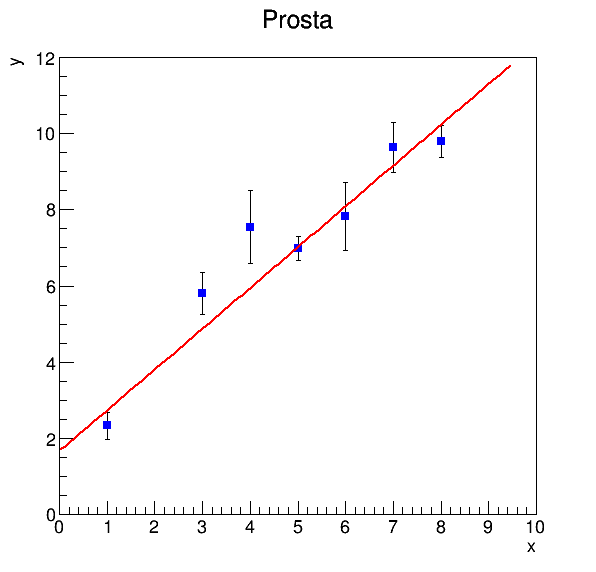

In [14]:
from IPython.display import Image
Image(filename='cFitting.png') 

# Example 7.1 - the same using the numpy and matplotlib

X values:
 [1 2 3 4 5 6 7 8]
Mean Y values:
 [ 2.87232453  4.70604864  7.34775383  9.36091647 10.259533   13.94332814
 13.14581345 16.26979234]
Y standard deviation:
 [0.98023823 0.79035224 2.39398393 2.51432363 1.09112383 1.81583364
 3.3223524  0.79266738]
Fitted values: a = 1.923939374308351, b = 0.9540401753767218
True values: a = 1.0, b = 2.0
chi2/NDF= 0.07401988183527541


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cFitting
Warning in <TROOT::Append>: Replacing existing TH1: hDummy (Potential memory leak).


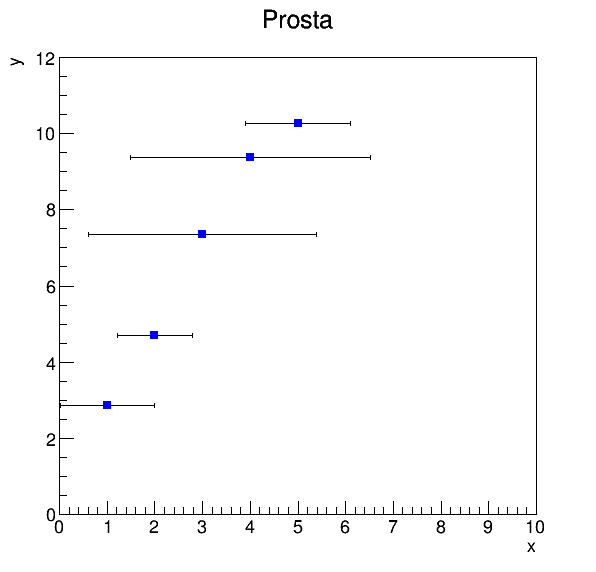

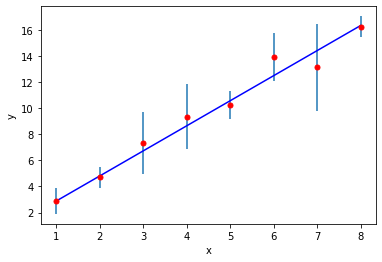

In [15]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from ROOT import *

a=1.
b=2.
nPoints = 10
#create a list of points
x = np.arange(start=1, stop=9, step=1)

#calculcate means
#clone the points - one line for each y value at hiven point.
# it is enough to clone x, the following arrays will be broadcasted nt the fly
y_means = a+b*x
y_means = y_means.reshape((-1,1))
y_means = np.broadcast_to(y_means, (len(y_means), nPoints))

#define sigmas
y_sigmas = np.array([ 1., 1., 2., 3., 1., 2.,  3., 1.]).reshape((-1,1))
#y_sigmas = np.full_like(y_means, 0.01) # test setting with very low sigma

#draw an array of random numbers with nPoints rows
values = np.random.default_rng().normal(loc=y_means, scale=y_sigmas)

y = np.mean(values, axis=1)
e = np.std(values, axis=1, ddof=1)
print("X values:\n",x)
print("Mean Y values:\n",y)
print("Y standard deviation:\n",e)

w = 1.0/e**2

S = np.sum(w)
Sx = np.sum(w*x)
Sy = np.sum(w*y)
Sxx = np.sum(w*x*x)
Sxy = np.sum(w*x*y)
  
D = S*Sxx-Sx*Sx
a_fit = (S*Sxy-Sx*Sy)/D
b_fit = (Sxx*Sy-Sx*Sxy)/D

d = (y-(a_fit*x+b_fit))/e
chi2 = np.sum(d)

print("Fitted values: a = {}, b = {}".format(a_fit,b_fit))
print("True values: a = {}, b = {}".format(a,b))
print ('chi2/NDF=',chi2/(len(x)-2.))

plt.errorbar(x, y, yerr=e, marker=".", linestyle="none", markerfacecolor="red", markeredgecolor="red", markersize=10)
plt.plot(x, (a_fit*x+b_fit), "b");
plt.xlabel("x")
plt.ylabel("y")

#gr = TGraph(len(x), x, y)

xx = array('d')
xx.fromlist(x.tolist())

yy = array('d')
yy.fromlist(y.tolist())

ee = array('d')
ee.fromlist(e.tolist())

gr = TGraphErrors(len(x), xx, yy, ee)
gr.SetMarkerColor(4)
gr.SetMarkerStyle(21)

c = TCanvas('cFitting','cFitting',600,600)
c.Draw()
hDummy = TH1D('hDummy','Prosta',100,0.,10.)
hDummy.SetMaximum(12.)
hDummy.SetMinimum(0.)
hDummy.GetXaxis().SetTitle("x")
hDummy.GetYaxis().SetTitle("y")
hDummy.SetStats(0)
hDummy.DrawCopy()
gr.Draw("s p")

# Example 8 - not only pyROOT 

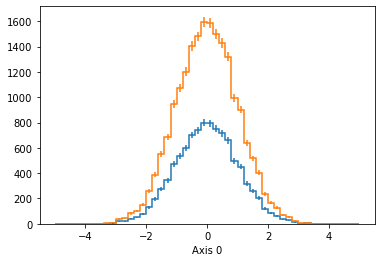

In [16]:
import numpy as np

import hist
from hist import Hist

histo = Hist(hist.axis.Regular(50, -5, 5))

data = np.random.randn(10000)

histo.fill(data)
histo.plot(); 

for aItem in data:
    histo.fill(aItem)
    
histo.plot();    